# Capstone Project: Segmenting and Clustering Neighbourhoods in Singapore to Provide Recommendations for Visitors 

Submission by: Linus Fones      
Date: 7 May 2020

## 1. Introduction

Singapore is a cosmopolitan metropolis just like New York and Toronto. Singapore is divided into 28 separate districts (or boroughs) and each district is made up of one or more neighbourhoods which offer distinctively different living experience. For example, a fascinating blend of old and new greets visitors in Singapore’s bustling Chinatown (in District 01), a haven for foodies, shoppers and history buffs. In contrast, Orchard Road (in District 09) is the ultimate browsing and buying destination in Singapore. Known for high-end boutiques and gleaming malls that beckon shoppers, this is Asia’s most famous shopping street.

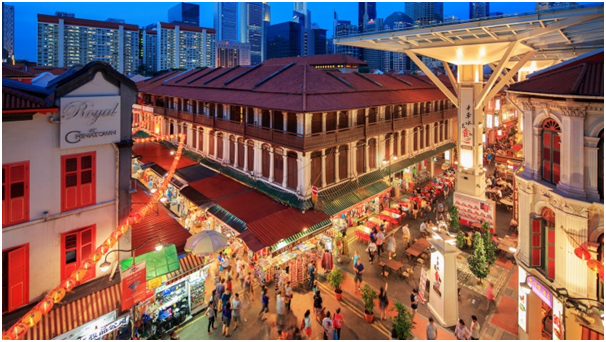

Chinatown (in District 01)


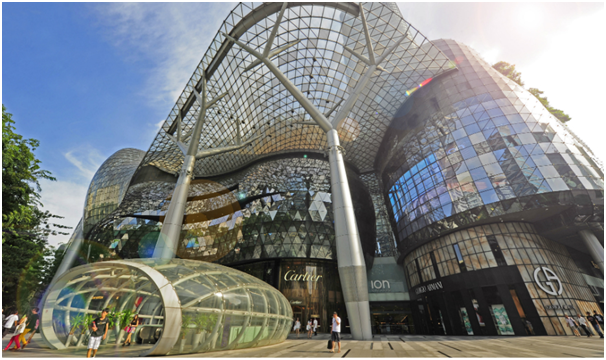

Orchard Road (in District 09)

If you are an expat or tourist, you might need recommendations on where to eat, where to stay, and where to explore in Singapore. In this capstone project, I will attempt to answer these questions with the help of location data provide by Foursquare API. 

The findings of this study can also be used by potential business owners when they are trying to start their businesses in Singapore. For example, if someone is looking to open a restaurant in Singapore, he might need recommendations on where to locate his restaurant. 

## 2. Data Description

A Wikipedia page exists that has all the postal districts and neighbourhoods needed to explore and cluster the districts (or boroughs) in Singapore. 

https://en.wikipedia.org/wiki/Postal_codes_in_Singapore


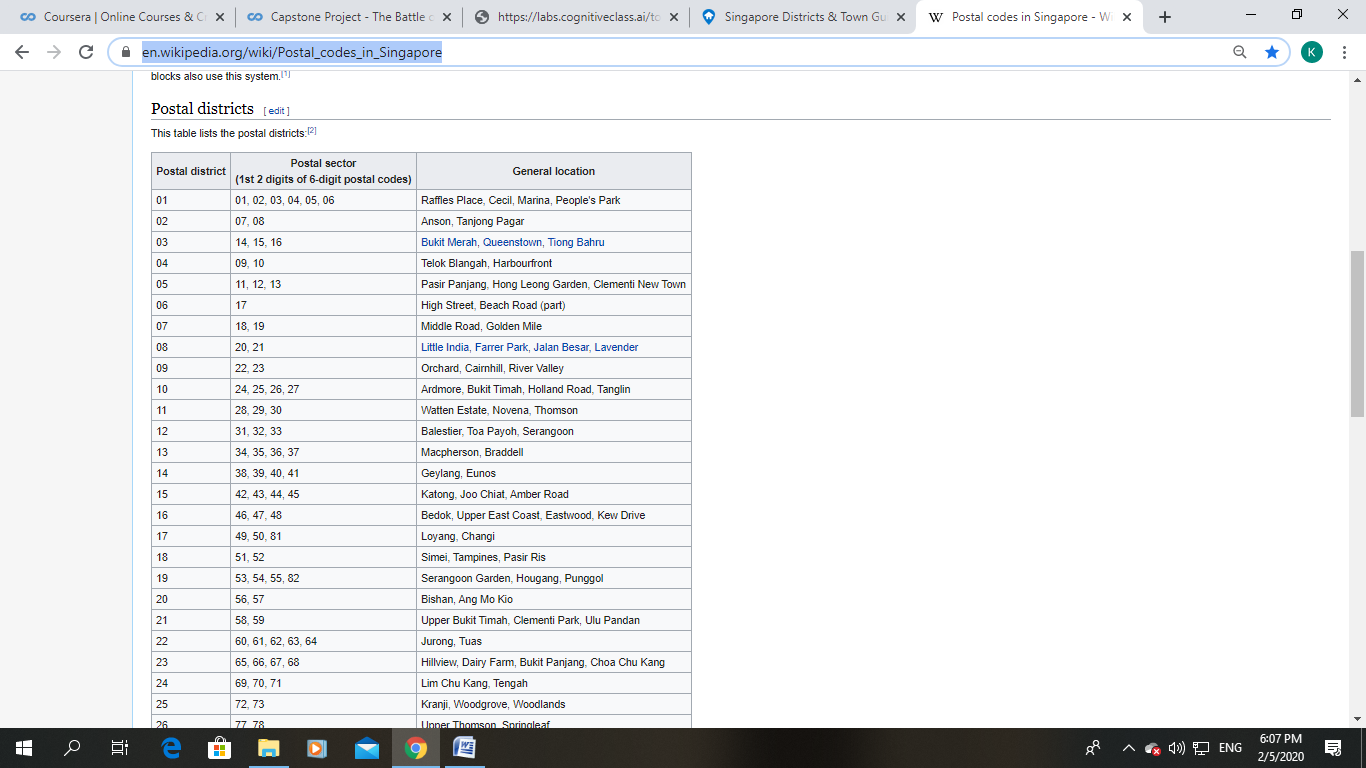

There is also a website that enables the user to find the latitude and longitude of each postal district. 

https://www.latlong.net/

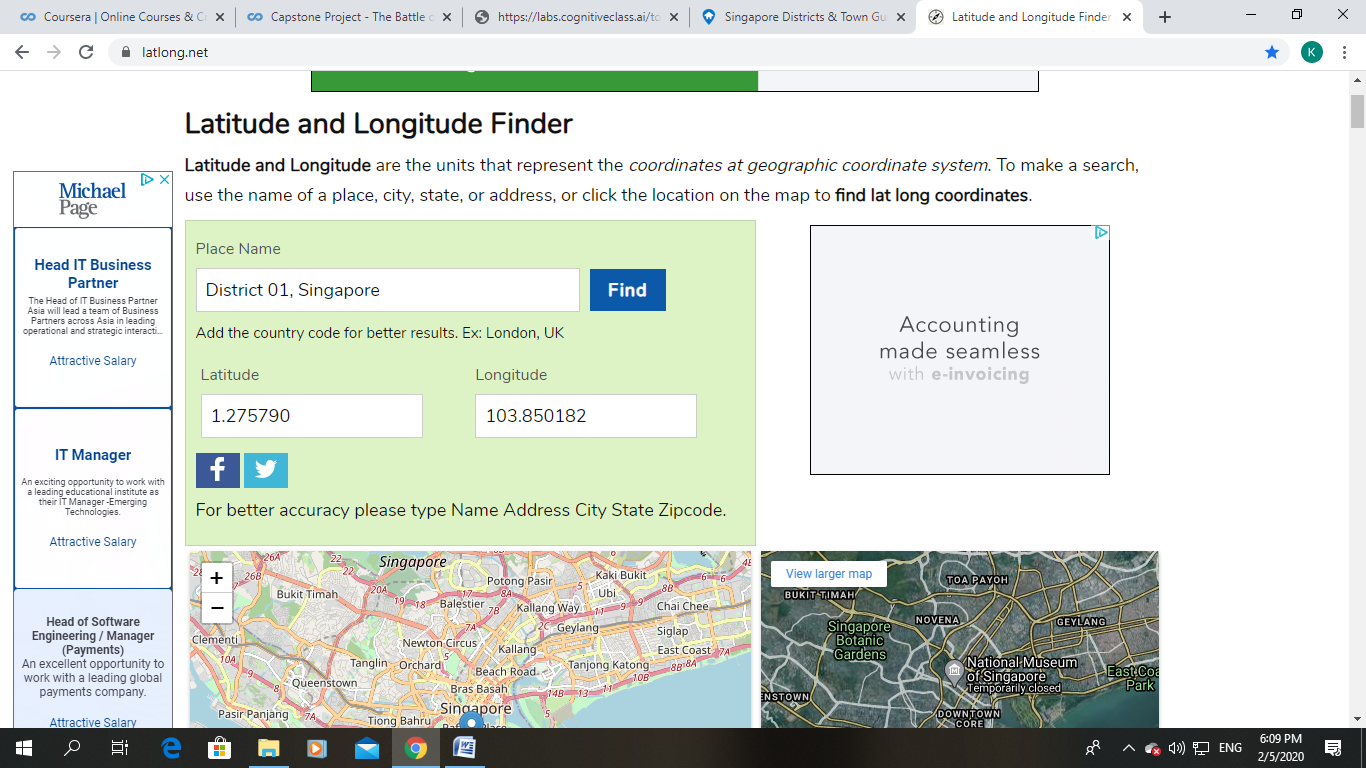

For the cost-conscious, there is a website that publishes the median rents for each district on a quarterly basis.

https://www.squarefoot.com.sg/market-watch/median-rents

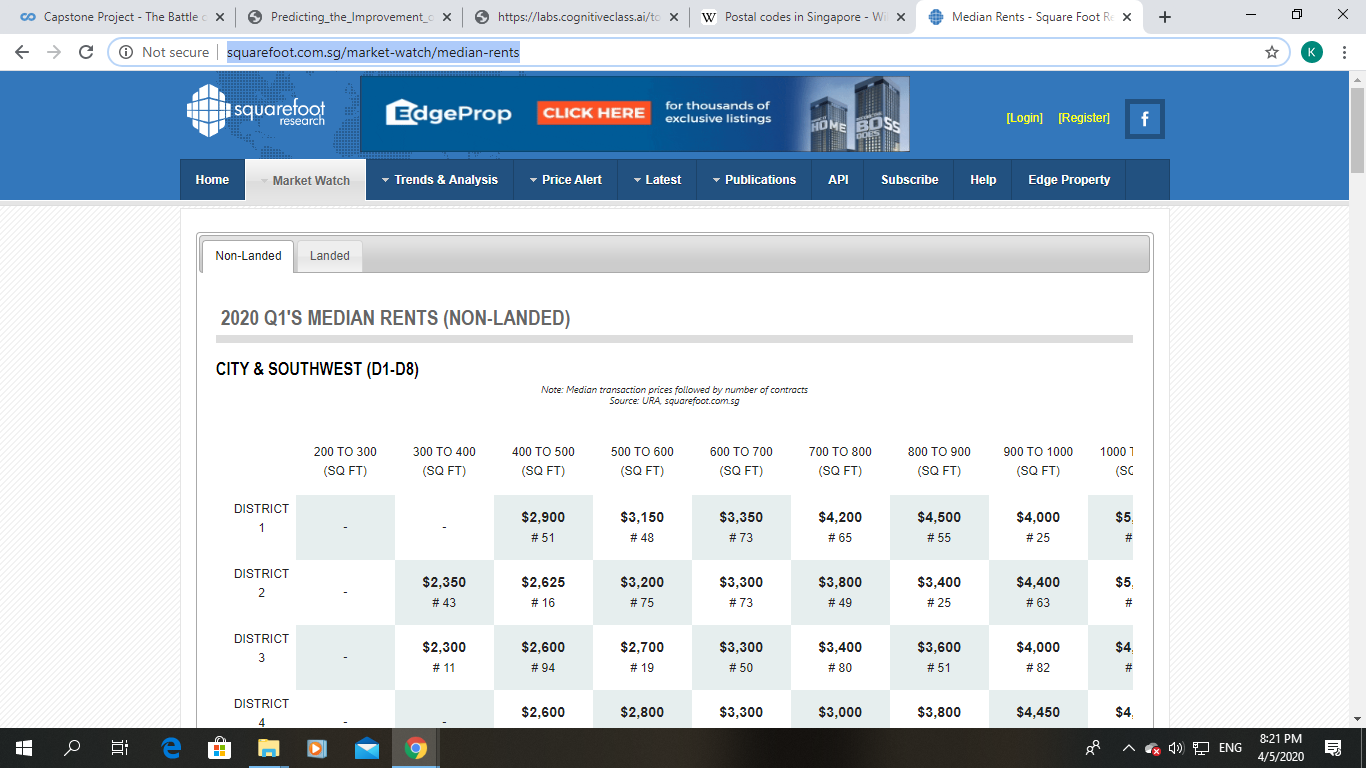

Firstly, the Wikipedia page can be scraped, and the data wrangled and cleansed before it is read into a pandas dataframe. Next, the latitude and longitude of each district can be found from latlong.net and added to the dataframe. Foursquare API can then be called to obtain a list of venues for each district. Lastly, rental prices can be inserted into the dataframe to provide a cost dimension for analysis.

Once this is done, each district can be analysed using descriptive statistics and machine learning algorithms to provide recommendations on where to eat, where to stay, and where to explore in Singapore.

# 3. Data Acquisition and Cleaning

### 3.1 Get the postal districts and neighborhoods in Singapore

##### Import necessary modules and libraries

In [1]:
#Import necessary modules and libraries
import pandas as pd
import numpy as np
from urllib.request import urlopen
!conda install -c conda-forge beautifulsoup4 --yes
from bs4 import BeautifulSoup 
!conda install -c conda-forge lxml --yes

import json # library to handle JSON files

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt

# import k-means from clustering stage
from sklearn.cluster import KMeans

!conda install -c conda-forge folium=0.5.0 --yes # install folium 
import folium # map rendering library

!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values


print('Libraries imported.')

Solving environment: done

# All requested packages already installed.

Solving environment: done

# All requested packages already installed.

Solving environment: done

# All requested packages already installed.

Solving environment: done

# All requested packages already installed.

Libraries imported.


##### Get the webpage from Wikipedia

In [2]:
#Get the webpage from Wikipedia - List of postal codes in Singapore

url = "https://en.wikipedia.org/wiki/Postal_codes_in_Singapore"
html = urlopen(url)

#Create a Beautiful Soup object from the html
soup = BeautifulSoup(html, 'lxml')
type(soup)

bs4.BeautifulSoup

##### Get the table with the postal district, postal sector and general location data

In [3]:
#Get the table with the postal district, postal sector and general location data
table = soup.find_all('table')[0] # Grab the first table
    
new_table = pd.DataFrame(columns=['Postal District', 'Postal Sector', 'General Location'], index = list(range(29))) # I know the size 
    
row_marker = 0
for row in table.find_all('tr'):
    column_marker = 0
    columns = row.find_all('td')
    for column in columns:
        new_table.iat[row_marker,column_marker] = column.get_text(strip=True)
        column_marker += 1
    row_marker += 1
new_table
new_table.drop(new_table.index[0], inplace=True) #drop fisrt row which is empty
new_table

,Postal District,Postal Sector,General Location
1,01,"01, 02, 03, 04, 05, 06","Raffles Place, Cecil, Marina, People's Park"
2,02,"07, 08","Anson, Tanjong Pagar"
3,03,"14, 15, 16","Bukit Merah,Queenstown,Tiong Bahru"
4,04,"09, 10","Telok Blangah, Harbourfront"
5,05,"11, 12, 13","Pasir Panjang, Hong Leong Garden, Clementi New..."
6,06,17,"High Street, Beach Road (part)"
7,07,"18, 19","Middle Road, Golden Mile"
8,08,"20, 21","Little India,Farrer Park,Jalan Besar,Lavender"
9,09,"22, 23","Orchard, Cairnhill, River Valley"
10,10,"24, 25, 26, 27","Ardmore, Bukit Timah, Holland Road, Tanglin"


In [4]:
#Write dataframe to file as backup
new_table.to_csv('postal_district.csv')

### 3.2 Load the Latitude, Longitude, and Rental Rates of each postal district from .csv file

In [5]:
singapore_data = pd.read_csv('postal_district_latlong.csv')
singapore_data 

,Postal District,Postal Sector,Neighborhood,Latitude,Longitude,Rental Rates
0,1,"01, 02, 03, 04, 05, 06","Raffles Place, Cecil, Marina, People's Park",1.283000,103.851300,5200
1,2,"07, 08","Anson, Tanjong Pagar",1.278000,103.840400,5050
2,3,"14, 15, 16","Bukit Merah,Queenstown,Tiong Bahru",1.289600,103.816800,4100
3,4,"09, 10","Telok Blangah, Harbourfront",1.270700,103.809900,4000
4,5,"11, 12, 13","Pasir Panjang, Hong Leong Garden, Clementi New...",1.296600,103.776400,3000
5,6,17,"High Street, Beach Road (part)",1.290950,103.848750,5738
6,7,"18, 19","Middle Road, Golden Mile",1.299540,103.851940,5000
7,8,"20, 21","Little India,Farrer Park,Jalan Besar,Lavender",1.305500,103.855400,3000
8,9,"22, 23","Orchard, Cairnhill, River Valley",1.304833,103.831833,4600
9,10,"24, 25, 26, 27","Ardmore, Bukit Timah, Holland Road, Tanglin",1.311040,103.804380,3575


##### Load Foursquare Credentails

In [1]:
CLIENT_ID = 'client id' # your Foursquare ID
CLIENT_SECRET = 'client secret' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version
LIMIT = 100 # limit of number of venues returned by Foursquare API

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: client id
CLIENT_SECRET:client secret


##### Write a function to get venues within 2km of a lat, long position

In [7]:
def getNearbyVenues(names, latitudes, longitudes, radius=2000):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

##### Call above function to get the nearby venues of each neighbourhood

In [8]:
singapore_venues = getNearbyVenues(names=singapore_data['Neighborhood'],
                                   latitudes=singapore_data['Latitude'],
                                   longitudes=singapore_data['Longitude']
                                  )
#Write to csv file just in case Foursqaure API is offline
singapore_venues.to_csv('singapore_venues.csv')


Raffles Place, Cecil, Marina, People's Park
Anson, Tanjong Pagar
Bukit Merah,Queenstown,Tiong Bahru
Telok Blangah, Harbourfront
Pasir Panjang, Hong Leong Garden, Clementi New Town
High Street, Beach Road (part)
Middle Road, Golden Mile
Little India,Farrer Park,Jalan Besar,Lavender
Orchard, Cairnhill, River Valley
Ardmore, Bukit Timah, Holland Road, Tanglin
Watten Estate, Novena, Thomson
Balestier, Toa Payoh, Serangoon
Macpherson, Braddell
Geylang, Eunos
Katong, Joo Chiat, Amber Road
Bedok, Upper East Coast, Eastwood, Kew Drive
Loyang, Changi
Simei, Tampines, Pasir Ris
Serangoon Garden, Hougang, Punggol
Bishan, Ang Mo Kio
Upper Bukit Timah, Clementi Park, Ulu Pandan
Jurong, Tuas
Hillview, Dairy Farm, Bukit Panjang, Choa Chu Kang
Lim Chu Kang, Tengah
Kranji, Woodgrove, Woodlands
Upper Thomson, Springleaf
Yishun, Sembawang
Seletar


In [9]:
print(singapore_venues.shape)
singapore_venues.head()

(2552, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,"Raffles Place, Cecil, Marina, People's Park",1.283,103.8513,The Fullerton Bay Hotel,1.283878,103.853314,Hotel
1,"Raffles Place, Cecil, Marina, People's Park",1.283,103.8513,CITY Hot Pot Shabu shabu,1.284173,103.851585,Hotpot Restaurant
2,"Raffles Place, Cecil, Marina, People's Park",1.283,103.8513,Virgin Active,1.284608,103.850815,Gym / Fitness Center
3,"Raffles Place, Cecil, Marina, People's Park",1.283,103.8513,Amoy Hotel,1.283118,103.848539,Hotel
4,"Raffles Place, Cecil, Marina, People's Park",1.283,103.8513,Fat Saigon Boy,1.282977,103.849068,Vietnamese Restaurant


## 4. Exploratory Data Analysis

##### Check the number of venues returned for each neighborhood

In [10]:
#Let's check how many venues were returned for each neighborhood
venue_count = singapore_venues.groupby('Neighborhood').count()
venue_count = venue_count['Venue']
venue_count

Neighborhood
Anson, Tanjong Pagar                                   100
Ardmore, Bukit Timah, Holland Road, Tanglin            100
Balestier, Toa Payoh, Serangoon                        100
Bedok, Upper East Coast, Eastwood, Kew Drive           100
Bishan, Ang Mo Kio                                     100
Bukit Merah,Queenstown,Tiong Bahru                     100
Geylang, Eunos                                         100
High Street, Beach Road (part)                         100
Hillview, Dairy Farm, Bukit Panjang, Choa Chu Kang      96
Jurong, Tuas                                           100
Katong, Joo Chiat, Amber Road                          100
Kranji, Woodgrove, Woodlands                            72
Lim Chu Kang, Tengah                                     7
Little India,Farrer Park,Jalan Besar,Lavender          100
Loyang, Changi                                          69
Macpherson, Braddell                                    95
Middle Road, Golden Mile                   

#### Generate Bar-chart to show the number of venues for each neighborhood

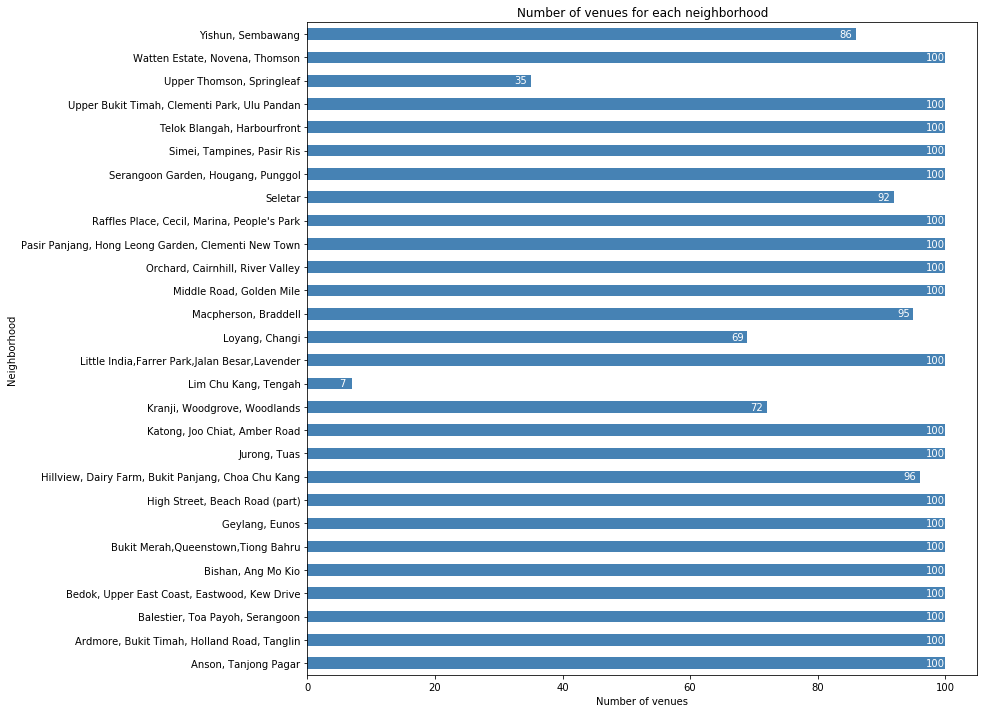

In [11]:
# generate horizontal bar chart
venue_count.plot(kind='barh', figsize=(12, 12), color='steelblue')
plt.xlabel('Number of venues') # add to x-label to the plot
#plt.ylabel('Neighborhood') # add y-label to the plot
plt.title('Number of venues for each neighborhood') # add title to the plot

# annotate value labels to each neighbourhood
for index, value in enumerate(venue_count): 
    label = format(int(value), ',') # format int with commas
    
    # place text at the end of bar 
    plt.annotate(label, # this is the text
                 (value,index), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(-10,-3), # distance from text to points (x,y)
                 ha='center', color='white') # horizontal alignment can be left, right or center

plt.show()


#### Determine the number of unique categories that can be curated from all the returned venues

In [12]:
print('There are {} uniques categories.'.format(len(singapore_venues['Venue Category'].unique())))

There are 258 uniques categories.


### 4.1 Segment the Neighborhoods

#### Encode venue category for analysis

In [13]:
# one hot encoding
singapore_onehot = pd.get_dummies(singapore_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
singapore_onehot['Neighborhood'] = singapore_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [singapore_onehot.columns[-1]] + list(singapore_onehot.columns[:-1])
singapore_onehot = singapore_onehot[fixed_columns]

singapore_onehot.head()

,Yoga Studio,American Restaurant,Aquarium,Arcade,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Australian Restaurant,...,Toy / Game Store,Trail,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Water Park,Waterfront,Whisky Bar,Wine Bar,Wings Joint
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [14]:
singapore_onehot.shape

(2552, 258)

#### Determine the mean of the frequency of occurrence of each category by neighborhood

In [15]:
singapore_grouped = singapore_onehot.groupby('Neighborhood').mean().reset_index()
singapore_grouped

,Neighborhood,Yoga Studio,American Restaurant,Aquarium,Arcade,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,...,Toy / Game Store,Trail,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Water Park,Waterfront,Whisky Bar,Wine Bar,Wings Joint
0,"Anson, Tanjong Pagar",0.01,0.000000,0.00,0.00,0.01,0.00,0.00,0.000000,0.000000,...,0.00,0.000000,0.000000,0.000000,0.01,0.000000,0.00,0.01,0.02,0.00
1,"Ardmore, Bukit Timah, Holland Road, Tanglin",0.00,0.000000,0.00,0.00,0.00,0.00,0.00,0.030000,0.000000,...,0.00,0.010000,0.020000,0.000000,0.00,0.000000,0.00,0.00,0.01,0.00
2,"Balestier, Toa Payoh, Serangoon",0.01,0.000000,0.00,0.00,0.01,0.00,0.00,0.010000,0.000000,...,0.00,0.000000,0.030000,0.000000,0.03,0.000000,0.00,0.01,0.00,0.00
3,"Bedok, Upper East Coast, Eastwood, Kew Drive",0.00,0.000000,0.00,0.00,0.00,0.00,0.00,0.050000,0.000000,...,0.00,0.000000,0.000000,0.000000,0.01,0.000000,0.00,0.00,0.01,0.00
4,"Bishan, Ang Mo Kio",0.00,0.000000,0.00,0.00,0.00,0.00,0.00,0.010000,0.000000,...,0.00,0.010000,0.010000,0.000000,0.00,0.000000,0.00,0.00,0.00,0.00
5,"Bukit Merah,Queenstown,Tiong Bahru",0.01,0.000000,0.00,0.00,0.00,0.00,0.00,0.020000,0.000000,...,0.00,0.010000,0.000000,0.000000,0.00,0.000000,0.00,0.00,0.00,0.00
6,"Geylang, Eunos",0.02,0.000000,0.00,0.00,0.01,0.00,0.00,0.010000,0.000000,...,0.00,0.000000,0.000000,0.000000,0.02,0.000000,0.01,0.01,0.00,0.00
7,"High Street, Beach Road (part)",0.01,0.000000,0.00,0.00,0.02,0.01,0.01,0.000000,0.000000,...,0.00,0.000000,0.000000,0.000000,0.01,0.000000,0.04,0.01,0.04,0.00
8,"Hillview, Dairy Farm, Bukit Panjang, Choa Chu ...",0.00,0.020833,0.00,0.00,0.00,0.00,0.00,0.020833,0.010417,...,0.00,0.093750,0.010417,0.000000,0.00,0.000000,0.00,0.00,0.00,0.00
9,"Jurong, Tuas",0.00,0.010000,0.00,0.00,0.01,0.00,0.00,0.080000,0.000000,...,0.00,0.000000,0.000000,0.000000,0.00,0.000000,0.00,0.00,0.00,0.01


#### Print out the top 5 most common venues for each neighborhood to see how they differ 

In [16]:
num_top_venues = 5

for hood in singapore_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = singapore_grouped[singapore_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Anson, Tanjong Pagar----
                 venue  freq
0                Hotel  0.08
1                 Café  0.05
2           Food Court  0.05
3  Japanese Restaurant  0.05
4    Korean Restaurant  0.04


----Ardmore, Bukit Timah, Holland Road, Tanglin----
                venue  freq
0  Chinese Restaurant  0.06
1      Ice Cream Shop  0.05
2              Bakery  0.04
3              Garden  0.04
4   French Restaurant  0.03


----Balestier, Toa Payoh, Serangoon----
                venue  freq
0   Indian Restaurant  0.12
1  Chinese Restaurant  0.07
2              Bakery  0.04
3         Coffee Shop  0.04
4                Café  0.04


----Bedok, Upper East Coast, Eastwood, Kew Drive----
                 venue  freq
0          Coffee Shop  0.10
1           Food Court  0.08
2  Japanese Restaurant  0.05
3     Asian Restaurant  0.05
4                 Café  0.05


----Bishan, Ang Mo Kio----
                 venue  freq
0   Chinese Restaurant  0.13
1           Food Court  0.08
2          Coffee Sh

#### Write a function to sort the venues in descending order

In [17]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

#### Create a new dataframe to display the top 10 venues for each neighborhood

In [18]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = singapore_grouped['Neighborhood']

for ind in np.arange(singapore_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(singapore_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,"Anson, Tanjong Pagar",Hotel,Japanese Restaurant,Food Court,Café,Coffee Shop,Korean Restaurant,Tapas Restaurant,Cocktail Bar,Spanish Restaurant,Mexican Restaurant
1,"Ardmore, Bukit Timah, Holland Road, Tanglin",Chinese Restaurant,Ice Cream Shop,Garden,Bakery,Dessert Shop,Asian Restaurant,French Restaurant,Indian Restaurant,Pizza Place,Performing Arts Venue
2,"Balestier, Toa Payoh, Serangoon",Indian Restaurant,Chinese Restaurant,Hotel,Coffee Shop,Bakery,Café,Food Court,Hostel,Thai Restaurant,Dessert Shop
3,"Bedok, Upper East Coast, Eastwood, Kew Drive",Coffee Shop,Food Court,Café,Japanese Restaurant,Asian Restaurant,Noodle House,Chinese Restaurant,Fast Food Restaurant,Seafood Restaurant,Dessert Shop
4,"Bishan, Ang Mo Kio",Chinese Restaurant,Food Court,Coffee Shop,Café,Japanese Restaurant,Park,Thai Restaurant,Ice Cream Shop,Spa,Supermarket
5,"Bukit Merah,Queenstown,Tiong Bahru",Café,Park,Food Court,Japanese Restaurant,Coffee Shop,Chinese Restaurant,Hotel,Indian Restaurant,Seafood Restaurant,Bakery
6,"Geylang, Eunos",Chinese Restaurant,BBQ Joint,Café,Thai Restaurant,Supermarket,Hostel,Coffee Shop,Food Court,Soup Place,Restaurant
7,"High Street, Beach Road (part)",Hotel,Japanese Restaurant,Waterfront,Wine Bar,Cocktail Bar,French Restaurant,Italian Restaurant,Lounge,Shopping Mall,Spanish Restaurant
8,"Hillview, Dairy Farm, Bukit Panjang, Choa Chu ...",Trail,Coffee Shop,Nature Preserve,Fast Food Restaurant,Café,Shopping Mall,Italian Restaurant,Sushi Restaurant,Food Court,Park
9,"Jurong, Tuas",Fast Food Restaurant,Food Court,Asian Restaurant,Coffee Shop,Japanese Restaurant,Dessert Shop,Chinese Restaurant,Supermarket,Café,Seafood Restaurant


### 4.2 Cluster the Neighborhoods

#### Determine the optimal value of k using an elbow plot

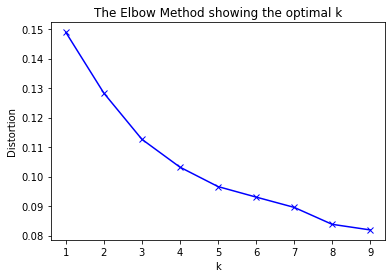

In [19]:
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt

singapore_grouped_clustering = singapore_grouped.drop('Neighborhood', 1)

X = singapore_grouped_clustering
# k means determine k
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(X)
    kmeanModel.fit(X)
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])

# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

#### Run k-means to cluster the neighborhood into 5 clusters

In [20]:
# set number of clusters
kclusters = 5
      
# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(singapore_grouped_clustering)

# check cluster labels generated for each row in the dataframe
print(kmeans.labels_)

[1 1 1 2 1 1 1 4 2 2 1 2 3 1 2 1 4 4 1 4 2 2 2 1 1 0 1 2]


#### Create a new dataframe that includes the cluster as well as the top 10 venues for each neighborhood

In [21]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

print(neighborhoods_venues_sorted.shape)
print(singapore_data.shape)

singapore_merged = singapore_data

# merge singapore_grouped with singapore_data to add latitude/longitude for each neighborhood
singapore_merged = singapore_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')


singapore_merged['Cluster Labels'].fillna(kclusters, inplace=True) #set neighborhood without cluster label to kclusters 

print(singapore_merged['Cluster Labels'].isna().sum())
print(singapore_merged.loc[singapore_merged['Cluster Labels']==kclusters]) # check neighborhood without venues!

(28, 12)
(28, 6)
0
Empty DataFrame
Columns: [Postal District, Postal Sector, Neighborhood, Latitude, Longitude, Rental Rates, Cluster Labels, 1st Most Common Venue, 2nd Most Common Venue, 3rd Most Common Venue, 4th Most Common Venue, 5th Most Common Venue, 6th Most Common Venue, 7th Most Common Venue, 8th Most Common Venue, 9th Most Common Venue, 10th Most Common Venue]
Index: []


## 5. Results

#### Visualize the resulting clusters using Folium

##### Get the geographical coordinates of Singapore

In [22]:
address = 'Singapore'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Singapore are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Singapore are 1.357107, 103.8194992.


##### Create a Singapore map and display the clusters in different colors using Folium

In [23]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters+1)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(singapore_merged['Latitude'], singapore_merged['Longitude'], singapore_merged['Neighborhood'], singapore_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[int(cluster)-1],
        fill=True,
        fill_color=rainbow[int(cluster)-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

#### This is how the map looks like

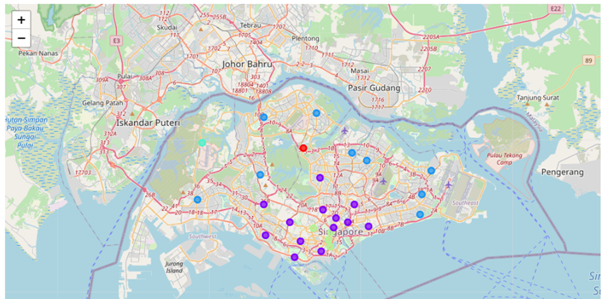

#### Examine the Clusters

##### Select the columns to display

In [24]:
cluster_df = singapore_merged.drop(['Postal Sector', 'Latitude', 'Longitude'], axis=1)

In [38]:
clusters = [1, 2, 3, 4, 5]
cluster_size = [0, 0, 0, 0, 0]
average_rental = [0, 0, 0, 0, 0]

#### Cluster 1: A neighborhood with a golf course and lake that is reasonably priced

In [26]:
cluster1 = cluster_df.loc[cluster_df['Cluster Labels'] == 0]
cluster1

,Postal District,Neighborhood,Rental Rates,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
25,26,"Upper Thomson, Springleaf",2125,0,Golf Course,Lake,Chinese Restaurant,Café,Gun Range,Bus Stop,Indian Restaurant,German Restaurant,Smoke Shop,Military Base


In [46]:
print("Average rental for Cluster 1: SGD%.2f" % cluster1["Rental Rates"].mean())
average_rental[0] = cluster1["Rental Rates"].mean()
cluster_size[0] = cluster1["Rental Rates"].count()

Average rental for Cluster 1: SGD2125.00


#### Cluster 2: Upmarket neighborhoods with multiple eateries serving a wide range of cuisines

In [28]:
cluster2 =cluster_df.loc[singapore_merged['Cluster Labels'] == 1]
cluster2

,Postal District,Neighborhood,Rental Rates,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,2,"Anson, Tanjong Pagar",5050,1,Hotel,Japanese Restaurant,Food Court,Café,Coffee Shop,Korean Restaurant,Tapas Restaurant,Cocktail Bar,Spanish Restaurant,Mexican Restaurant
2,3,"Bukit Merah,Queenstown,Tiong Bahru",4100,1,Café,Park,Food Court,Japanese Restaurant,Coffee Shop,Chinese Restaurant,Hotel,Indian Restaurant,Seafood Restaurant,Bakery
3,4,"Telok Blangah, Harbourfront",4000,1,Chinese Restaurant,Café,Scenic Lookout,Food Court,Trail,Beach,Park,Candy Store,Multiplex,Shopping Mall
4,5,"Pasir Panjang, Hong Leong Garden, Clementi New...",3000,1,Coffee Shop,Sandwich Place,Café,Japanese Restaurant,Supermarket,Italian Restaurant,Chinese Restaurant,Indian Restaurant,Food Court,Breakfast Spot
7,8,"Little India,Farrer Park,Jalan Besar,Lavender",3000,1,Indian Restaurant,Hotel,Chinese Restaurant,Café,Coffee Shop,Vegetarian / Vegan Restaurant,Thai Restaurant,Cocktail Bar,Italian Restaurant,Movie Theater
9,10,"Ardmore, Bukit Timah, Holland Road, Tanglin",3575,1,Chinese Restaurant,Ice Cream Shop,Garden,Bakery,Dessert Shop,Asian Restaurant,French Restaurant,Indian Restaurant,Pizza Place,Performing Arts Venue
10,11,"Watten Estate, Novena, Thomson",3350,1,Chinese Restaurant,Hotel,Bakery,Café,Dessert Shop,Food Court,Coffee Shop,Supermarket,Italian Restaurant,Flower Shop
11,12,"Balestier, Toa Payoh, Serangoon",3050,1,Indian Restaurant,Chinese Restaurant,Hotel,Coffee Shop,Bakery,Café,Food Court,Hostel,Thai Restaurant,Dessert Shop
12,13,"Macpherson, Braddell",3000,1,Food Court,Chinese Restaurant,Coffee Shop,Asian Restaurant,Noodle House,Café,Convenience Store,Seafood Restaurant,Hotel,Indian Restaurant
13,14,"Geylang, Eunos",2700,1,Chinese Restaurant,BBQ Joint,Café,Thai Restaurant,Supermarket,Hostel,Coffee Shop,Food Court,Soup Place,Restaurant


In [47]:
print("Average rental for Cluster 2: SGD%.2f" % cluster2["Rental Rates"].mean())
average_rental[1] = cluster2["Rental Rates"].mean()
cluster_size[1] = cluster2["Rental Rates"].count()

Average rental for Cluster 2: SGD3351.92


#### Cluster 3: Suburban neighborhoods with many coffee shops and food courts that are affordably priced

In [30]:
cluster3 = cluster_df.loc[cluster_df['Cluster Labels'] == 2]
cluster3

,Postal District,Neighborhood,Rental Rates,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
15,16,"Bedok, Upper East Coast, Eastwood, Kew Drive",2600,2,Coffee Shop,Food Court,Café,Japanese Restaurant,Asian Restaurant,Noodle House,Chinese Restaurant,Fast Food Restaurant,Seafood Restaurant,Dessert Shop
16,17,"Loyang, Changi",2200,2,Coffee Shop,Fast Food Restaurant,Gym,Supermarket,Resort,Thai Restaurant,Food Court,Café,Chinese Restaurant,Karaoke Bar
17,18,"Simei, Tampines, Pasir Ris",2600,2,Coffee Shop,Japanese Restaurant,Food Court,Sandwich Place,Café,Bakery,Noodle House,Dessert Shop,Gym,Asian Restaurant
18,19,"Serangoon Garden, Hougang, Punggol",2700,2,Food Court,Coffee Shop,Fast Food Restaurant,Café,Chinese Restaurant,Sandwich Place,Supermarket,Asian Restaurant,Shopping Mall,Trail
21,22,"Jurong, Tuas",2750,2,Fast Food Restaurant,Food Court,Asian Restaurant,Coffee Shop,Japanese Restaurant,Dessert Shop,Chinese Restaurant,Supermarket,Café,Seafood Restaurant
22,23,"Hillview, Dairy Farm, Bukit Panjang, Choa Chu ...",2400,2,Trail,Coffee Shop,Nature Preserve,Fast Food Restaurant,Café,Shopping Mall,Italian Restaurant,Sushi Restaurant,Food Court,Park
24,25,"Kranji, Woodgrove, Woodlands",2100,2,Food Court,Coffee Shop,Asian Restaurant,Japanese Restaurant,Park,Café,Clothing Store,Indian Restaurant,Racetrack,Fast Food Restaurant
26,27,"Yishun, Sembawang",2400,2,Coffee Shop,Asian Restaurant,Chinese Restaurant,Indian Restaurant,Food Court,Fried Chicken Joint,Thai Restaurant,Park,Sushi Restaurant,Bar
27,28,Seletar,2700,2,Food Court,Coffee Shop,Café,Supermarket,Fast Food Restaurant,Snack Place,Noodle House,Asian Restaurant,Shopping Mall,Bus Station


In [48]:
print("Average rental for Cluster 3: SGD%.2f" % cluster3["Rental Rates"].mean())
average_rental[2] = cluster3["Rental Rates"].mean()
cluster_size[2] = cluster3["Rental Rates"].count()

Average rental for Cluster 3: SGD2494.44


#### Cluster 4: A neighborhood surrounded by farmland

In [32]:
cluster4 = cluster_df.loc[cluster_df['Cluster Labels'] == 3]
cluster4 

,Postal District,Neighborhood,Rental Rates,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
23,24,"Lim Chu Kang, Tengah",2250,3,Farm,Bus Station,Café,Outdoors & Recreation,Wings Joint,Fish & Chips Shop,Flea Market,Flower Shop,Food,Food & Drink Shop


In [49]:
print("Average rental for Cluster 4: SGD%.2f" % cluster4["Rental Rates"].mean())
average_rental[3] = cluster4["Rental Rates"].mean()
cluster_size[3] = cluster4["Rental Rates"].count()

Average rental for Cluster 4: SGD2250.00


#### Cluster 5: Neighborhoods near the city centre where high-end hotels and shopping malls are located

In [34]:
cluster5 = cluster_df.loc[singapore_merged['Cluster Labels'] == 4]
cluster5

,Postal District,Neighborhood,Rental Rates,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,1,"Raffles Place, Cecil, Marina, People's Park",5200,4,Hotel,Waterfront,Coffee Shop,Italian Restaurant,Spanish Restaurant,Salad Place,Plaza,Performing Arts Venue,Shopping Mall,Lounge
5,6,"High Street, Beach Road (part)",5738,4,Hotel,Japanese Restaurant,Waterfront,Wine Bar,Cocktail Bar,French Restaurant,Italian Restaurant,Lounge,Shopping Mall,Spanish Restaurant
6,7,"Middle Road, Golden Mile",5000,4,Hotel,Indian Restaurant,Cocktail Bar,Café,Japanese Restaurant,Shopping Mall,Performing Arts Venue,French Restaurant,Italian Restaurant,Buffet
8,9,"Orchard, Cairnhill, River Valley",4600,4,Hotel,Japanese Restaurant,Shopping Mall,Department Store,Coffee Shop,Clothing Store,Boutique,Bakery,Chinese Restaurant,Cosmetics Shop


In [50]:
print("Average rental for Cluster 5: SGD%.2f" % cluster5["Rental Rates"].mean())
average_rental[4] = cluster5["Rental Rates"].mean()
cluster_size[4] = cluster5["Rental Rates"].count()

Average rental for Cluster 5: SGD5134.50


#### Plot the size of each cluster

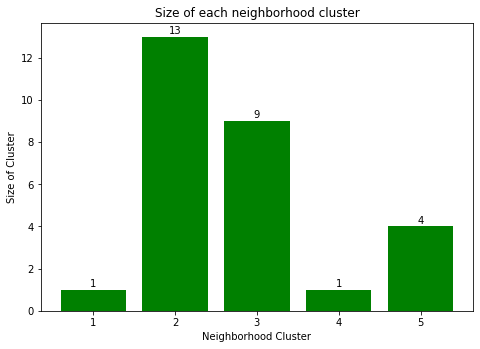

In [54]:
# Plot the size ofr each cluster
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(clusters,cluster_size, color='g')
plt.xlabel('Neighborhood Cluster')
plt.ylabel('Size of Cluster')
plt.title('Size of each neighborhood cluster')

# annotate value labels to each neighbourhood
for index, value in enumerate(cluster_size): 
    label = value
    # place text at the end of bar 
    plt.annotate(label, # this is the text
                 (index+1,value), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,3), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center
plt.show()

#### Plot average rental for each cluster

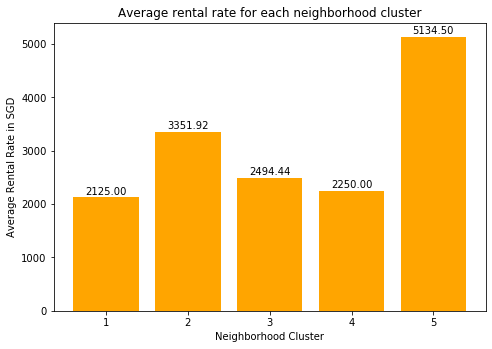

In [57]:
# Plot average_rental for each cluster
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(clusters,average_rental, color='orange')
plt.xlabel('Neighborhood Cluster')
plt.ylabel('Average Rental Rate in SGD')
plt.title('Average rental rate for each neighborhood cluster')

# annotate value labels to each neighbourhood
for index, value in enumerate(average_rental): 
    label = "{:.2f}".format(value) #format rmtal value to 2 decimal places
    
    # place text at the end of bar 
    plt.annotate(label, # this is the text
                 (index+1,value), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,3), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center
plt.show()

## 6. Observations and Recommendations

Some observations can be made from the unique characteristics of the different neighbourhood clusters. For instance, cluster 2 is the biggest cluster that is made up of 13 matured estates with multiple eateries serving a wide range of cuisines. Most of the neighbourhoods in this cluster are located at the fringe of the city centre where the average rental rate for a 1000-1100 sq ft apartment is around SGD 3351.92. 

The second biggest cluster (3) is made up of 9 suburban or less-matured neighbourhoods that have many coffee shops and food courts selling a wide variety of local food at affordable prices. As all of these neighbourhoods are further from the city centre (>10km), the average rental rate for a 1000-1100 sq ft apartment is around SGD 2494.44. 

The third biggest cluster (5) consists of 4 neighbourhoods that make up the city centre where most high-end hotels and shopping malls are located. The average rental rate for a 1000-1100 sq ft apartment is around SGD 5134.54.

It was observed in section 4.0 that the number of venues for the Lim Chu Kang, Tengah neighbourhood (7) and Upper Thomson, Springleaf neighbourhood (35) was quite small as compared to the rest of the neighbourhoods. It was also observed in section 5.0 that the top two venues of the Lim Chu Kang, Tengah neighbourhood and Upper Thomson, Springleaf neighbourhood were quite different from the rest of the neighbourhoods. The top two venues for the Lim Chu Kang, Tengah neighbourhood were farm and cafeteria, and golf course and lake for the Upper Thomson, Springleaf neighbourhood. This explains why they ended up as single-neighbourhood clusters.
 

For visitors who are used to eating at restaurants and can fork out more than SGD3000 per month for a 1000-1100 sq ft apartment should explore neighborhood cluster 2. For those who are more cost-conscious and are used to eating local food, they can consider neighborhood cluster 3. When cost isn't a concern and proximity to the city centre is a priority then cluster 5 will be the perfect choice. Visitors who are keen to visit a farm or have a farm stay should explore the Lim Chu Kang, Tengah neighborhood (cluster 4) where most of Singapore's farms are located. Golfers who want to stay near the golf course and have a scenic lake-view should consider the Upper Thomson, Springleaf neighborhood (cluster 0) where rental rates are quite affordable.

## 7. Conclusion

In this study, I have segmented the 28 postal districts of Singapore based on the venue information provided by Foursquare API. I have performed statistical analysis to determine the mean of the frequency of occurrence of each venue category by neighbourhood, and have determined the top 10 venues of each neighbourhood. I have then clustered the neighbourhoods using the k-means machine learning algorithm, and visualised the results using the Folium Python library. Some observations and recommendations were made from the unique characteristics of the different neighbourhood clusters. For example, visitors who are used to eating at restaurants and can fork out more than SGD3000 per month for a 1000-1100 sq ft apartment should explore neighbourhood cluster 2.

# 8. Future Directions

The observations made in this study can also be used by potential business owners when they are trying to start their businesses in Singapore. For instance, if someone is looking to open a restaurant in Singapore, he might want to consider locating it in neighbourhood cluster 2 where residents are more likely to eat at restaurants regularly. This is inferred from restaurants being the first and second most common venues in cluster 2 and has to be confirmed by a separate study or survey. A contractor who is trying to start a business to serve the hospitality and retail sectors should consider locating its head office in neighbourhood cluster 5 where majority of high-end hotels and shopping malls are located. However, that will also mean higher operating costs as the rental rates are higher.